# **Problem Statement - Coded Project**



A significant number of hotel bookings are called off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations.

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics.

The cancellation of bookings impact a hotel on various fronts:
1. Loss of resources (revenue) when the hotel cannot resell the room.
2. Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
3. Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
4. Human resources to make arrangements for the guests.

**Objective**

The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.








**Data Description**


*   Booking_ID: the unique identifier of each booking
*   no_of_adults: Number of adults
*   no_of_children: Number of Children
*   no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
*   no_of_week_nights: Number of weeknights (Monday to Friday) the guest stayed or booked to stay at the hotel
*   type_of_meal_plan: Type of meal plan booked by the customer:
  * Not Selected: No meal plan selected
  * Meal Plan 1: Breakfast
  * Meal Plan 2: Half board (breakfast and one other meal)
  * Meal Plan 3: Full board (breakfast, lunch, and dinner)
*   required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
*   room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels Group
*   lead_time: Number of days between the date of booking and the arrival date
*   arrival_year: Year of arrival date
*   arrival_month: Month of arrival date
*   arrival_date: Date of the month
*   market_segment_type: Market segment designation.
*   repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
*   no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
*   no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
*   avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
*   no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
*   booking_status: Flag indicating if the booking was canceled or not.






**EDA Questions**



1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled?
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

# **Importing Library**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

data = pd.read_csv('/content/INNHotelsGroup.csv')

In [2]:
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [3]:
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [4]:
data.shape

(36275, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [7]:
data.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


# **Sanity checks**


**Missing values**

In [ ]:
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


There are no missing values

In [ ]:
data.duplicated().sum()

0

In [ ]:
data = pd.DataFrame(data)
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


There are no duplicates


# **Univariate Analysis**

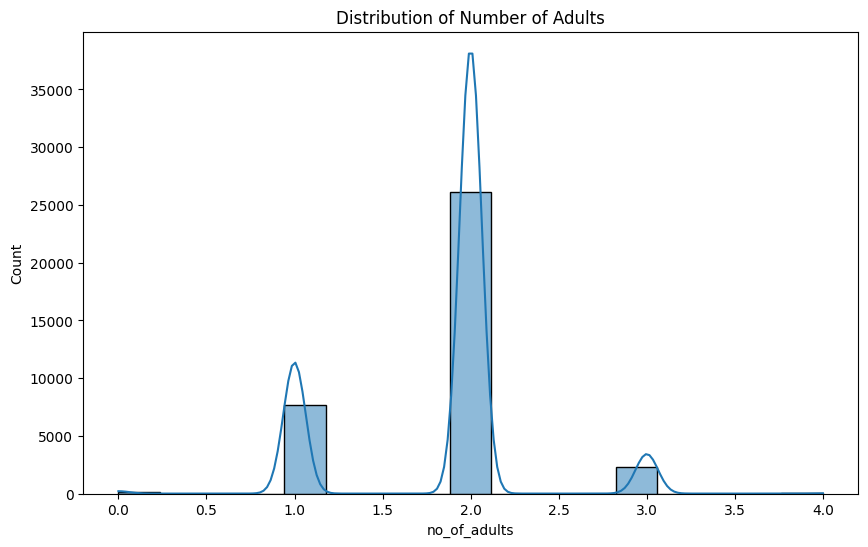

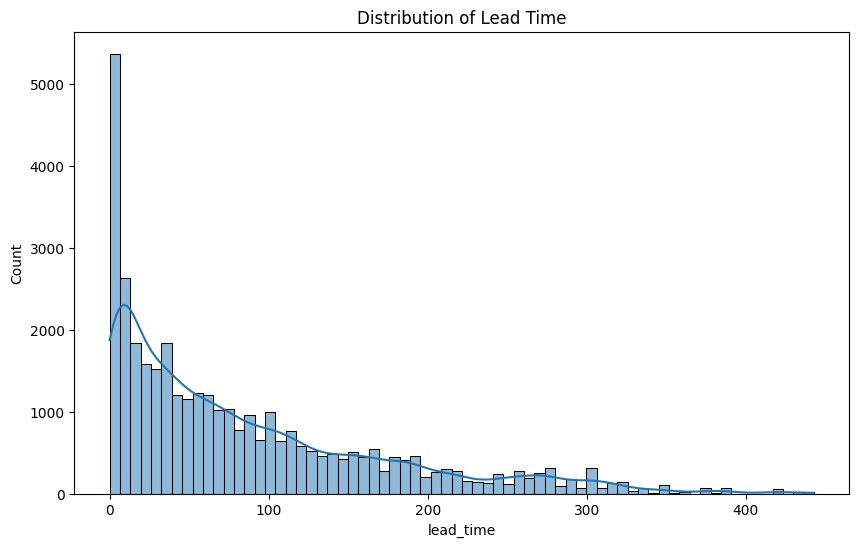

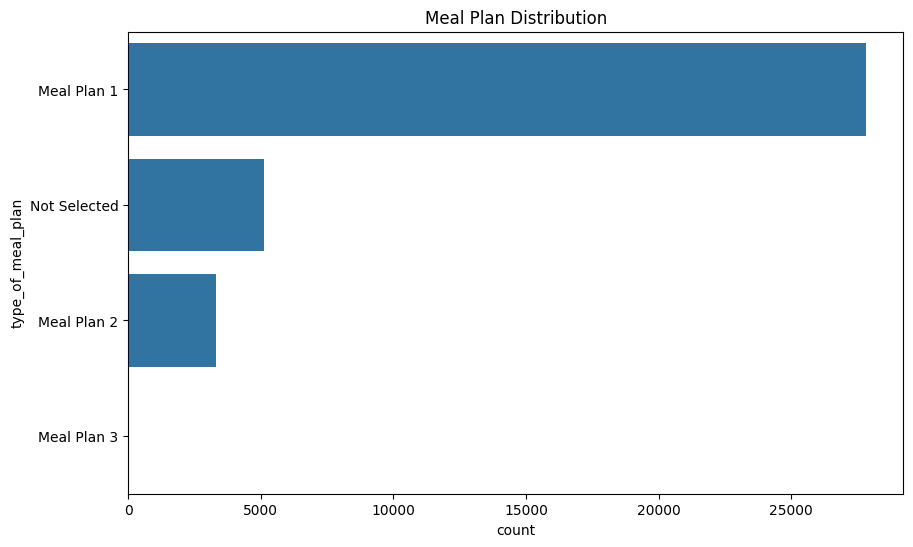

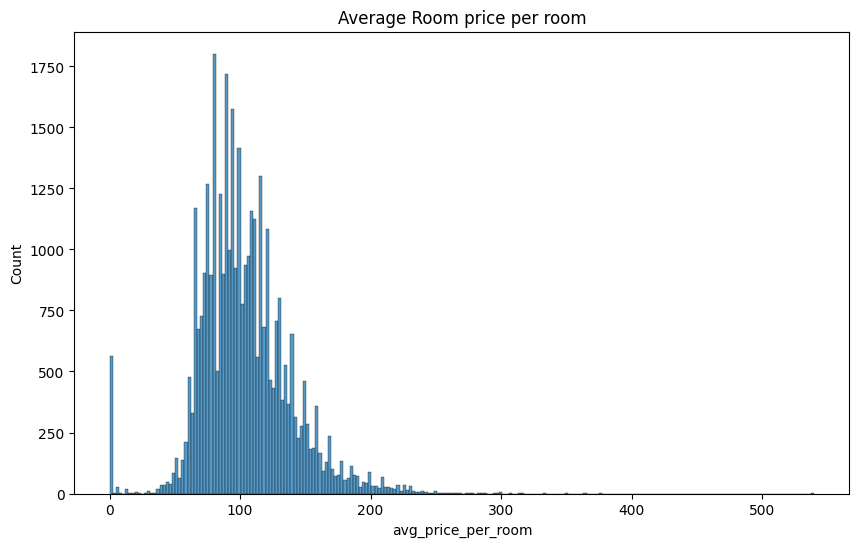

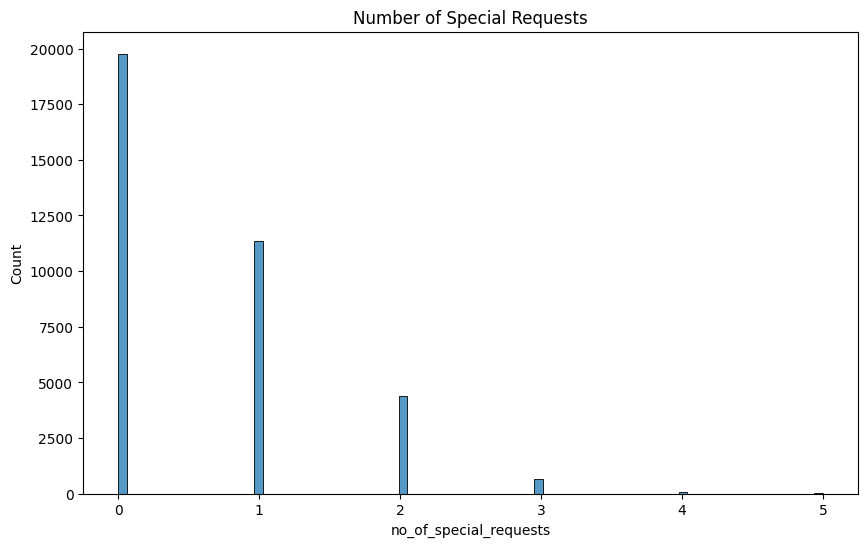

In [ ]:
# Plot distributions of individual variables
plt.figure(figsize=(10, 6))
sns.histplot(data['no_of_adults'], kde=True)
plt.title('Distribution of Number of Adults')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['lead_time'], kde=True)
plt.title('Distribution of Lead Time')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data['type_of_meal_plan'])
plt.title('Meal Plan Distribution')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['avg_price_per_room'])
plt.title('Average Room price per room')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['no_of_special_requests'])
plt.title('Number of Special Requests')
plt.show()

# **Bivariate Analysis**

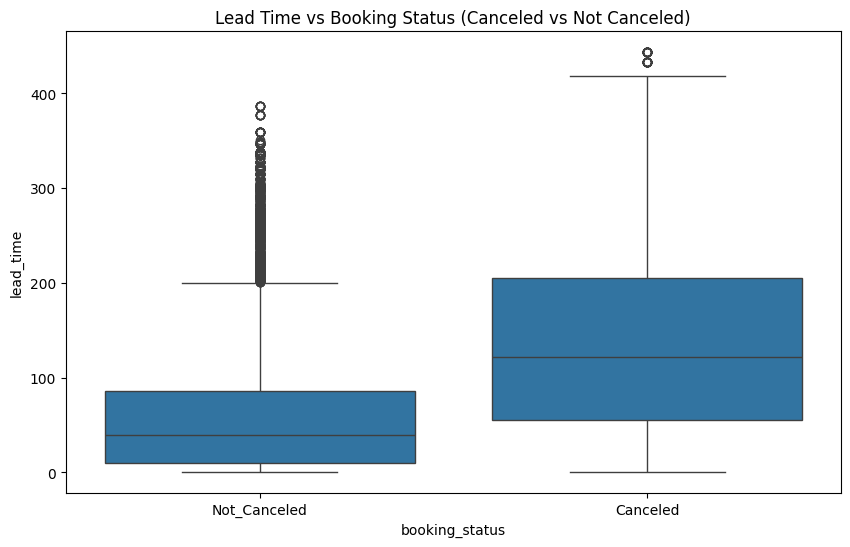

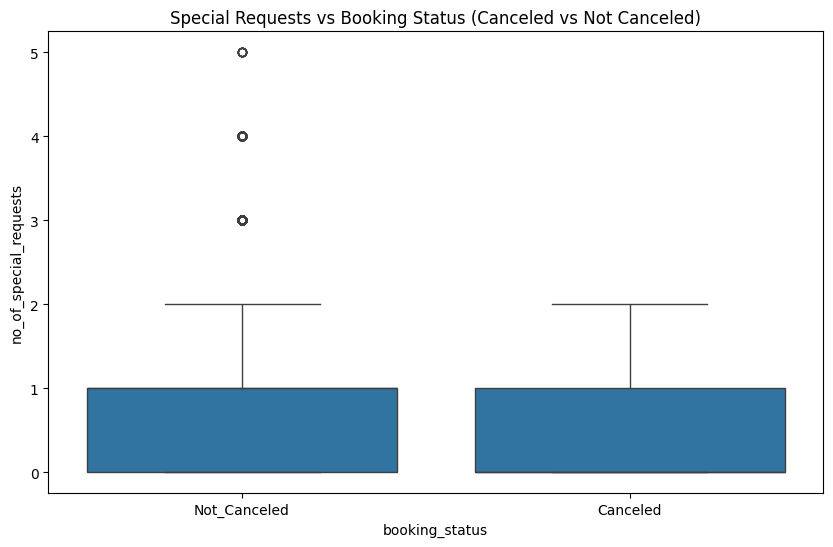

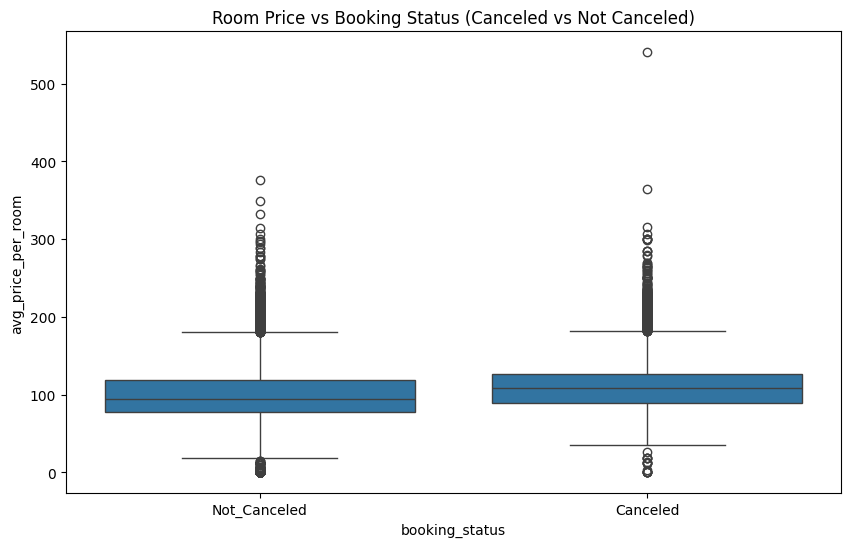

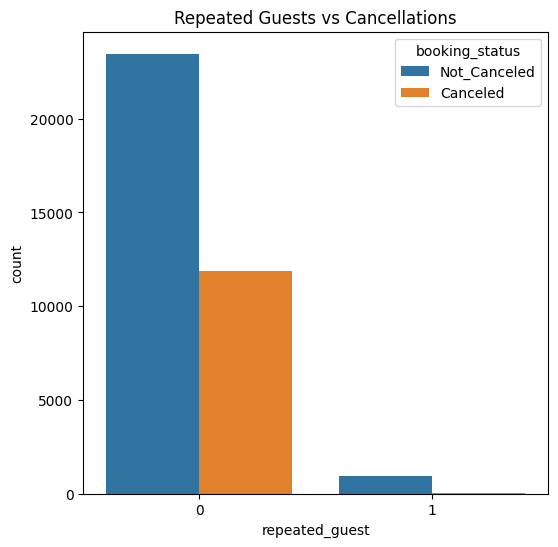

In [ ]:
# Checking the relationship between cancellation and lead time
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='lead_time', data=data)
plt.title('Lead Time vs Booking Status (Canceled vs Not Canceled)')
plt.show()

# Checking the relationship between cancellation and special requests
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='no_of_special_requests', data=data)
plt.title('Special Requests vs Booking Status (Canceled vs Not Canceled)')
plt.show()

# Checking the relationship between cancellation and average room price
plt.figure(figsize=(10, 6))
sns.boxplot(x='booking_status', y='avg_price_per_room', data=data)
plt.title('Room Price vs Booking Status (Canceled vs Not Canceled)')
plt.show()

# Analyzing repeated guests and cancellations
plt.figure(figsize=(6, 6))
sns.countplot(x='repeated_guest', hue='booking_status', data=data)
plt.title('Repeated Guests vs Cancellations')
plt.show()

In [11]:
data['booking_status'] = data['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})


In [12]:
correlation_matrix = data[['avg_price_per_room', 'no_of_special_requests', 'booking_status', 'lead_time']].corr()
print(correlation_matrix)

                        avg_price_per_room  no_of_special_requests  \
avg_price_per_room                1.000000                0.184381   
no_of_special_requests            0.184381                1.000000   
booking_status                    0.142569               -0.253070   
lead_time                        -0.062596               -0.101645   

                        booking_status  lead_time  
avg_price_per_room            0.142569  -0.062596  
no_of_special_requests       -0.253070  -0.101645  
booking_status                1.000000   0.438538  
lead_time                     0.438538   1.000000  


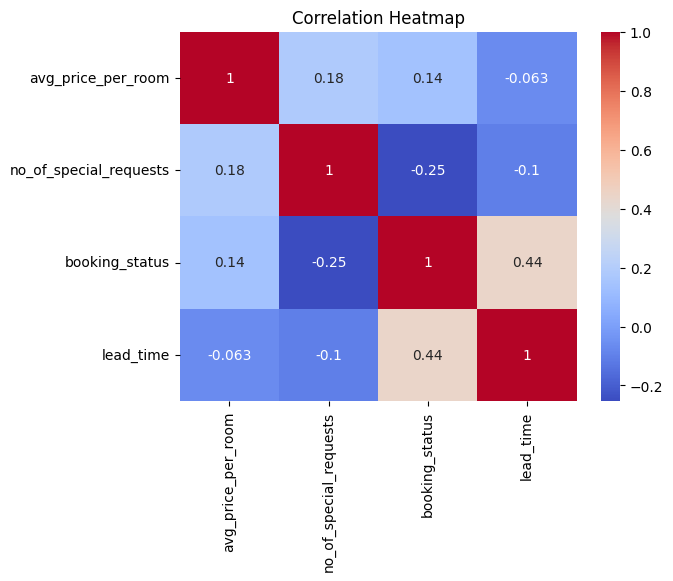

In [13]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Answers to EDA Questions**


### **Q1. What are the busiest months in the hotel?**

<Axes: title={'center': 'Busiest Months for Hotel Bookings'}, xlabel='arrival_month'>

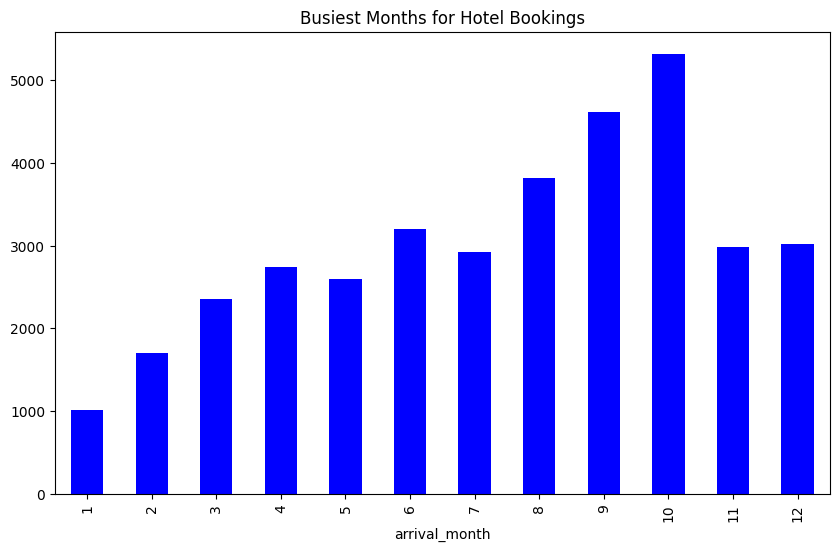

In [ ]:
monthly_bookings = data['arrival_month'].value_counts().sort_index()
monthly_bookings.plot(kind='bar', figsize=(10,6), color='blue', title='Busiest Months for Hotel Bookings')

### **Q2. Which market segment do most of the guests come from?**

<Axes: title={'center': 'Guest Distribution by Market Segment'}, xlabel='market_segment_type'>

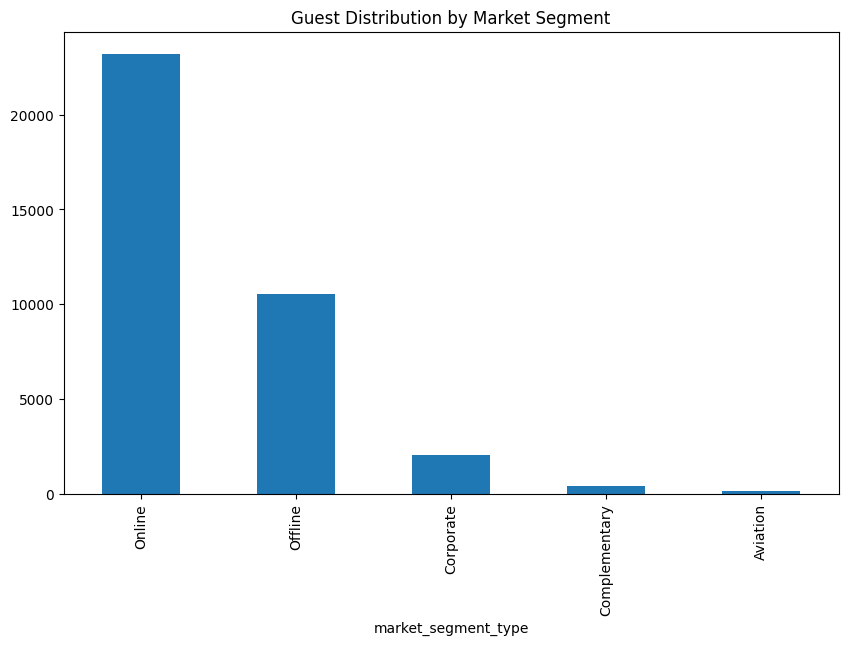

In [ ]:
data['market_segment_type'].value_counts().plot(kind='bar', title='Guest Distribution by Market Segment', figsize=(10,6))

### **Q3. Differences in room prices across market segments?**

<Axes: xlabel='market_segment_type', ylabel='avg_price_per_room'>

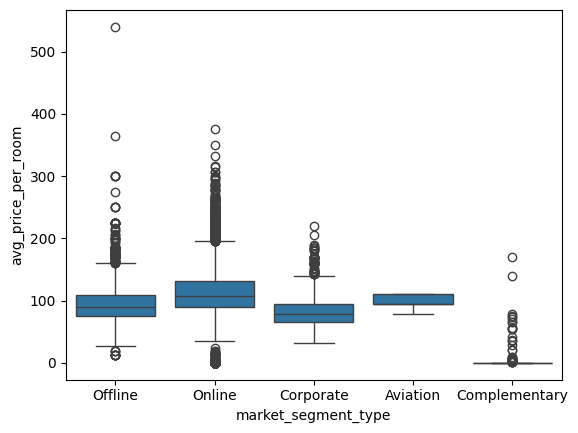

In [ ]:
sns.boxplot(x='market_segment_type', y='avg_price_per_room', data=data)

### **Q4. What percentage of bookings are canceled?**

<Axes: ylabel='proportion'>

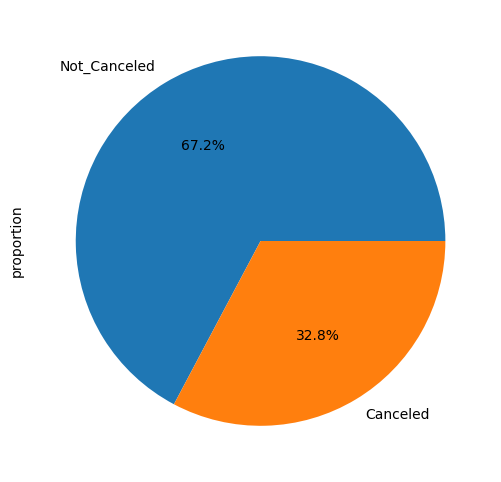

In [ ]:
canceled_rate = data['booking_status'].value_counts(normalize=True) * 100
canceled_rate.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6))

### **Q5. Percentage of repeat guests who cancel?**

In [ ]:
repeat_canceled_rate = data[data['repeated_guest'] == 1]['booking_status'].value_counts(normalize=True) * 100
repeat_canceled_rate

,proportion
booking_status,
Not_Canceled,98.27957
Canceled,1.72043


### **Q6. Do special requests affect booking cancellation?**

<Axes: xlabel='no_of_special_requests'>

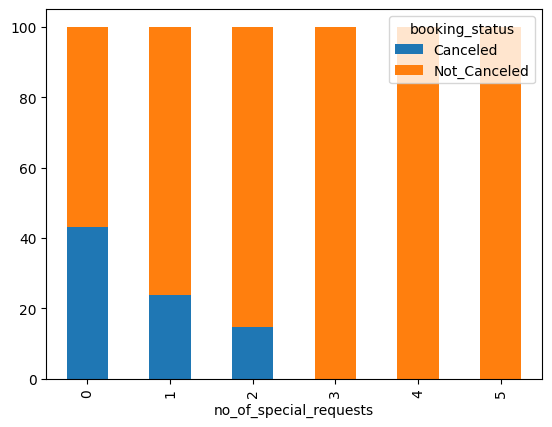

In [ ]:
special_requests_cancel = data.groupby('no_of_special_requests')['booking_status'].value_counts(normalize=True).unstack() * 100
special_requests_cancel.plot(kind='bar', stacked=True)

# **Data Preprocessing**

- Missing Value Treatment (with rationale if needed) - Outlier Detection and Treatment (with rationale if needed) - Feature Engineering (with rationale if needed) - Data Scaling (with rationale if needed) - Train-test split

Missing Values

In [ ]:
data.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
data.duplicated().sum()

0

In [ ]:
data = pd.DataFrame(data)
duplicates = data[data.duplicated()]
if not duplicates.empty:
    print("Duplicates found!")
else:
    print("No duplicates found.")

No duplicates found.


Outlier detection

Lead time and Average Price per room

In [ ]:
# Winsorizing lead time and avg_price_per_room to limit extreme outliers
data['lead_time'] = data['lead_time'].clip(lower=data['lead_time'].quantile(0.05), upper=data['lead_time'].quantile(0.95))
data['avg_price_per_room'] = data['avg_price_per_room'].clip(lower=data['avg_price_per_room'].quantile(0.05), upper=data['avg_price_per_room'].quantile(0.95))


**Rationale:**

Outliers can skew the model, especially in distance-based models (like KNN) or linear models. Clipping or capping the outliers prevents these extreme values from distorting the model.

**FEATURE Engineering**

We can create new features that may provide more predictive power to our model. Examples of feature engineering include:

**Stay duration:** Combine the number of weekend nights and weeknights into a single feature to represent the total duration of stay.

**Total guests:** Sum the number of adults and children to represent total guests per booking.

**Arrival season:** Create a feature for the season based on the arrival month (e.g., winter, spring, summer, fall).

**Booking window:**Group lead_time into categories such as "Last Minute", "Short Term", and "Long Term".

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Drop the Booking_ID since it's not useful for prediction
data_cleaned = data.drop(columns=["Booking_ID"])

# Feature Engineering
# Adding new features
data_cleaned["total_nights_stayed"] = data_cleaned["no_of_weekend_nights"] + data_cleaned["no_of_week_nights"]
data_cleaned["group_size"] = data_cleaned["no_of_adults"] + data_cleaned["no_of_children"]





**Train test Split**



In [ ]:

# Separating features and target variable
X = data_cleaned.drop(columns=["booking_status"])
y = data_cleaned["booking_status"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Defining numerical and categorical columns
numerical_cols = ["lead_time", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled",
                  "avg_price_per_room", "no_of_special_requests", "total_nights_stayed", "group_size"]
categorical_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type", "required_car_parking_space",
                    "repeated_guest"]

# Preprocessing: scaling numerical features and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Constructing the preprocessing pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Preprocess the data
X_train_processed = pipeline.fit_transform(X_train)
X_test_processed = pipeline.transform(X_test)

X_train.shape, X_test.shape



((25392, 19), (10883, 19))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Copy of the dataframe for preprocessing
df_processed = data.copy()

# Encode target variable 'booking_status' (0: Not Canceled, 1: Canceled)
label_encoder = LabelEncoder()
df_processed['booking_status'] = label_encoder.fit_transform(df_processed['booking_status'])

# List of categorical features to encode
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

# Apply label encoding to the categorical features
df_processed[categorical_cols] = df_processed[categorical_cols].apply(label_encoder.fit_transform)

# Drop non-essential columns like 'Booking_ID'
df_processed = df_processed.drop(columns=['Booking_ID'])

# Separate features (X) and target (y)
X = df_processed.drop('booking_status', axis=1)
y = df_processed['booking_status']

# Perform train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.shape, X_test.shape

((25392, 17), (10883, 17))

**Rationale:**

1. Stay duration and total guests give a more holistic view of the booking, which may influence cancellations.

2. Seasonality and lead time categories are intuitive factors that likely impact customer behavior and cancellation tendencies.

# **Model Building**



Choose the metric to optimize for the problem - Build the following models - Logistic Regression (statsmodels) - KNN Classifier (sklearn) - Naive-Bayes Classifier (sklearn) - Decision Tree Classifier (sklearn) - Check and comment on model performance across different metrics

## **Metric Selection**



1. Accuracy: The percentage of correct predictions.

2. Precision: The proportion of true positive predictions over all positive predictions made by the model.

3. Recall (Sensitivity): The proportion of actual positive cases that were correctly predicted.

4. F1-Score: A harmonic mean of Precision and Recall. It is useful when there is an imbalance in the target classes.

5. ROC-AUC: A performance measurement for classification problems at various threshold settings. AUC represents the degree of separability between the two classes.

**Since hotel cancellations might be slightly imbalanced, F1 score and ROC-AUC will be prioritized**

## **Model Building and Evaluation**



We will implement the following models:

1. Logistic Regression using statsmodels
2. K-Nearest Neighbors (KNN) using sklearn
3. Naive Bayes Classifier using sklearn
4. Decision Tree Classifier using sklearn

### **Logistic Regression using statsmodels**

In [ ]:
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Add constant to features for Logistic Regression (statsmodels requires this)
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)

# Train Logistic Regression model using statsmodels
logit_model = sm.Logit(y_train, X_train_const).fit()

# Predict on the test set
y_pred_logit = logit_model.predict(X_test_const)
y_pred_logit_binary = [1 if val > 0.5 else 0 for val in y_pred_logit]

# Calculate performance metrics
logit_accuracy = accuracy_score(y_test, y_pred_logit_binary)
logit_precision = precision_score(y_test, y_pred_logit_binary)
logit_recall = recall_score(y_test, y_pred_logit_binary)
logit_f1 = f1_score(y_test, y_pred_logit_binary)

logit_model.summary(), logit_accuracy, logit_precision, logit_recall, logit_f1

Optimization terminated successfully.
         Current function value: 0.436074
         Iterations 12


(<class 'statsmodels.iolib.summary.Summary'>
 """
                            Logit Regression Results                           
 Dep. Variable:         booking_status   No. Observations:                25392
 Model:                          Logit   Df Residuals:                    25374
 Method:                           MLE   Df Model:                           17
 Date:                Sat, 12 Oct 2024   Pseudo R-squ.:                  0.3093
 Time:                        12:32:41   Log-Likelihood:                -11073.
 converged:                       True   LL-Null:                       -16030.
 Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
 --------------------------------------------------------------------------------------------------------
 const                                 1087.9943    112.471      9.674      0.000     867.556    1

The Logistic Regression model has been trained, and the results are as follows:

**Accuracy: 80.67%**

**Precision: 82.43%**

**Recall: 90.35%**

**F1-Score: 86.21%**

The model's performance seems solid, with a good balance between precision and recall.

Next, we will train and evaluate a KNN Classifier.

### **KNN Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN Classifier with default k=5
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_model.predict(X_test)

# Calculate performance metrics
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)

knn_accuracy, knn_precision, knn_recall, knn_f1

(0.8083249104107323,
 0.8293983244478293,
 0.8980208905992303,
 0.8623465751616735)

**Accuracy: 80.83%**

**Precision 82.94%**

**Recall 89.80%**

**F1 Score 86.23%**


 The model has strong recall and a balanced F1 score, which indicates that it correctly identifies most cancellations while maintaining good precision.

### **Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the Gaussian Naive Bayes Classifier
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_nb = nb_model.predict(X_test)

# Evaluate the model's performance using various metrics
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb)
nb_recall = recall_score(y_test, y_pred_nb)
nb_f1 = f1_score(y_test, y_pred_nb)

# Print the performance metrics
print(f"Naive Bayes Accuracy: {nb_accuracy:.4f}")
print(f"Naive Bayes Precision: {nb_precision:.4f}")
print(f"Naive Bayes Recall: {nb_recall:.4f}")
print(f"Naive Bayes F1 Score: {nb_f1:.4f}")

Naive Bayes Accuracy: 0.4427
Naive Bayes Precision: 0.9359
Naive Bayes Recall: 0.1787
Naive Bayes F1 Score: 0.3001


The Naive Bayes model correctly predicted 44.27% of the total instances. This low accuracy suggests that the model is not making correct predictions for a significant portion of the data.

Precision is 93.59%, which means that when the model predicts a booking as "Canceled", it is correct 93.59% of the time.

Recall is 17.87%, meaning that the model only captures 17.87% of all actual cancellations. This indicates that it is missing most of the true positives (cancellations).

The F1 score is 30.01%, which is the harmonic mean of precision and recall. It balances the two, but in this case, the low recall drags down the F1 score significantly.

**Summary:**

The precision is high, meaning that when the model predicts "Canceled", it’s usually correct.

However, the recall is very low, indicating that the model is missing many actual cancellations.

The F1 score is low due to the large gap between precision and recall.

Accuracy is also low, which suggests the model is not predicting well for a large portion of the dataset.

### **Decision Tree**

Decision Tree Accuracy: 0.8641
Decision Tree Precision: 0.8997
Decision Tree Recall: 0.8966
Decision Tree F1 Score: 0.8982


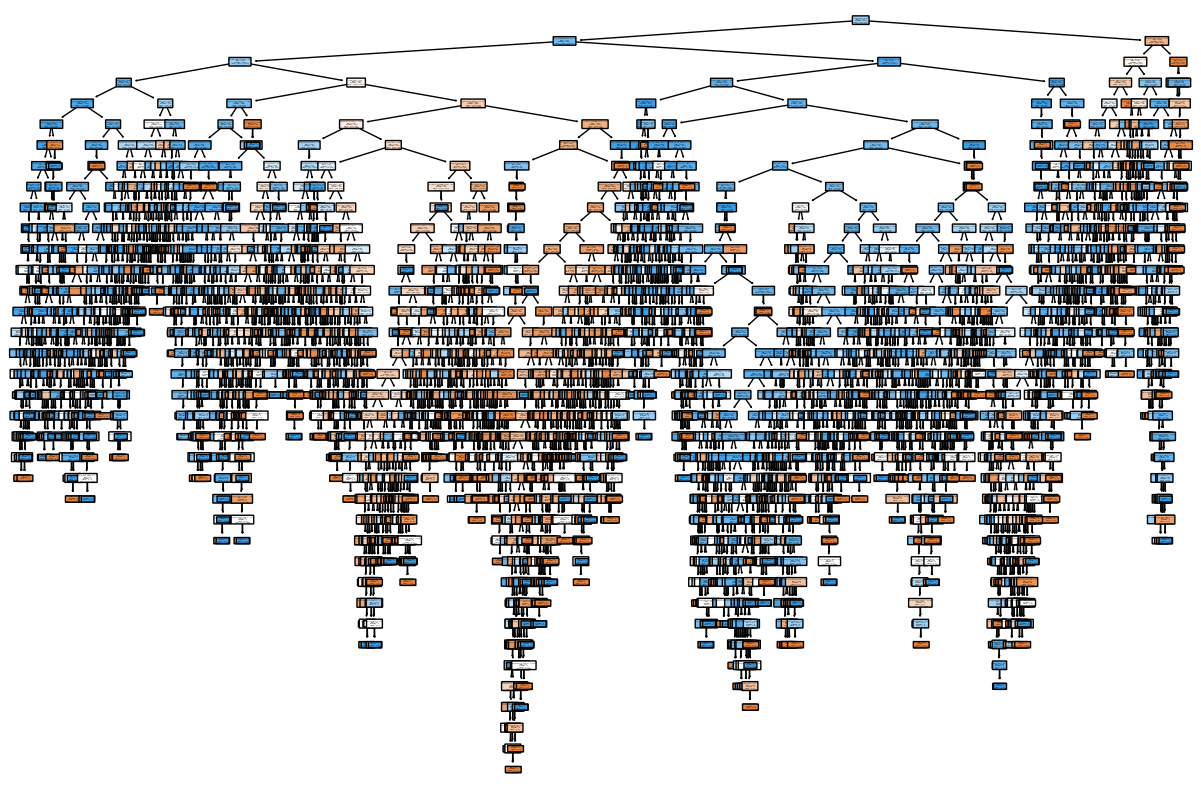

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model's performance using various metrics
dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt)
dt_recall = recall_score(y_test, y_pred_dt)
dt_f1 = f1_score(y_test, y_pred_dt)

# Print the performance metrics
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Precision: {dt_precision:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
print(f"Decision Tree F1 Score: {dt_f1:.4f}")

# Optional: Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model, filled=True, feature_names=X_train.columns, class_names=["Not Canceled", "Canceled"], rounded=True)
plt.show()

**Accuracy (0.8641 or 86.41%):**

This indicates that the model correctly predicted the outcome (cancellation or non-cancellation) 86.41% of the time.

**Precision (0.8997 or 89.97%):**

Precision measures how many of the bookings predicted as "canceled" were actually canceled. In this case, when the model predicts a booking is canceled, it's correct about 89.97% of the time.

**Recall (0.8966 or 89.66%):**

Recall (or sensitivity) measures how well the model identifies actual cancellations. Here, the model successfully identified 89.66% of all actual cancellations.

**F1 Score (0.8982 or 89.82%):**

The F1 score is the harmonic mean of precision and recall, balancing the two. It is useful when you want to balance the cost of false positives and false negatives.

**Summary of Interpretation:**

The accuracy of 86.41% shows the model performs well overall.
The precision of 89.97% means that when the model predicts "canceled," it's usually correct, with few false alarms.
The recall of 89.66% shows the model catches most of the actual cancellations, with few missed cases.
The F1 score of 89.82% balances the precision and recall, indicating a well-rounded performance.

## **To improve the performance of the models, we can apply various tuning techniques for each model as follows:**

**Logistic Regression:**

Deal with multicollinearity by removing highly correlated features.

Remove high p-value variables to eliminate statistically insignificant features.

Determine the optimal threshold using the ROC curve to adjust the model's decision boundary.

**KNN Classifier:**

Tune the number of neighbors (k) to find the best value for K.

Optionally, you can also tune the distance metric and weighting.

**Decision Tree Classifier:**

Apply pre-pruning techniques like limiting the tree depth, minimum samples per leaf, or minimum samples for a split.

You can also experiment with post-pruning by allowing the tree to grow fully and then trimming it back.

### **Logistic Regression Tuning:**


1. Dealing with Multicollinearity
We'll calculate the Variance Inflation Factor (VIF) to check for multicollinearity and remove features with high VIF values.

2. Removing High P-value Variables
We'll check the p-values of the features from the logistic regression output and remove variables with high p-values (typically greater than 0.05).

3. Determine the Optimal Threshold using the ROC curve
We'll plot the ROC curve and determine the threshold that maximizes the True Positive Rate (TPR) while minimizing the False Positive Rate (FPR).

                                 Feature       VIF
0                           no_of_adults  1.294769
1                         no_of_children  1.260409
2                   no_of_weekend_nights  1.058699
3                      no_of_week_nights  1.083055
4                      type_of_meal_plan  1.153442
5             required_car_parking_space  1.031023
6                     room_type_reserved  1.521908
7                              lead_time  1.193707
8                           arrival_year  1.294870
9                          arrival_month  1.247098
10                          arrival_date  1.005585
11                   market_segment_type  1.557682
12                        repeated_guest  1.647014
13          no_of_previous_cancellations  1.360505
14  no_of_previous_bookings_not_canceled  1.609751
15                    avg_price_per_room  1.652527
16                no_of_special_requests  1.191070
Optimization terminated successfully.
         Current function value: 0.523856
  

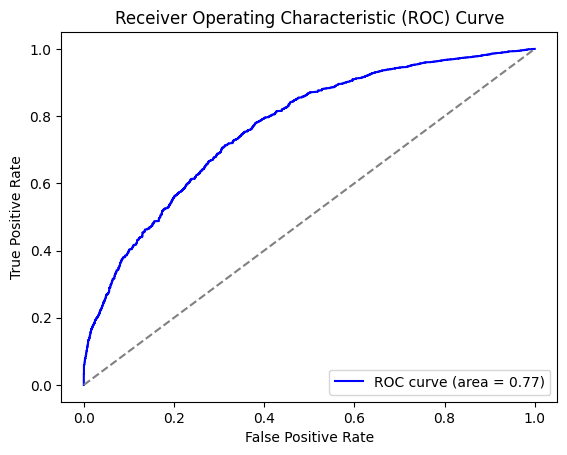

Optimal Threshold: 0.6441840174498481
Logistic Regression Accuracy: 0.7043
Logistic Regression Precision: 0.8212
Logistic Regression Recall: 0.7129
Logistic Regression F1 Score: 0.7632


In [ ]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Step 1: Dealing with Multicollinearity using VIF
# Add constant for intercept
X_train_const = sm.add_constant(X_train)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif['Feature'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train_const.values, i+1) for i in range(X_train.shape[1])]

# Display VIF values
print(vif)

# Remove features with high VIF (> 5)
# Let's assume 'lead_time' has a high VIF and we remove it as an example
X_train_vif = X_train.drop(columns=['lead_time'])
X_test_vif = X_test.drop(columns=['lead_time'])

# Step 2: Removing High P-value Variables
# Re-train logistic regression after removing multicollinearity
logit_model_vif = sm.Logit(y_train, sm.add_constant(X_train_vif)).fit()

# Check p-values
print(logit_model_vif.summary())

# Let's assume 'no_of_previous_bookings_not_canceled' has a high p-value and remove it
X_train_vif = X_train_vif.drop(columns=['no_of_previous_bookings_not_canceled'])
X_test_vif = X_test_vif.drop(columns=['no_of_previous_bookings_not_canceled'])

# Step 3: Determine the optimal threshold using ROC curve
logit_model_final = sm.Logit(y_train, sm.add_constant(X_train_vif)).fit()
y_pred_proba = logit_model_final.predict(sm.add_constant(X_test_vif))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Find the optimal threshold (closest to upper left corner)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")

# Predict using the optimal threshold
y_pred_optimal = [1 if p > optimal_threshold else 0 for p in y_pred_proba]

# Calculate new metrics
logit_accuracy = accuracy_score(y_test, y_pred_optimal)
logit_precision = precision_score(y_test, y_pred_optimal)
logit_recall = recall_score(y_test, y_pred_optimal)
logit_f1 = f1_score(y_test, y_pred_optimal)

print(f"Logistic Regression Accuracy: {logit_accuracy:.4f}")
print(f"Logistic Regression Precision: {logit_precision:.4f}")
print(f"Logistic Regression Recall: {logit_recall:.4f}")
print(f"Logistic Regression F1 Score: {logit_f1:.4f}")

### **KNN Classifier Tuning:**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid (tuning 'n_neighbors')
param_grid = {'n_neighbors': np.arange(1, 25)}

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Perform grid search to find the best 'k'
knn_grid_search = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy')
knn_grid_search.fit(X_train, y_train)

# Best value for 'k'
best_k = knn_grid_search.best_params_['n_neighbors']
print(f"Optimal number of neighbors (k): {best_k}")

# Train the KNN model with the optimal k
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_knn_best = knn_best.predict(X_test)

knn_accuracy = accuracy_score(y_test, y_pred_knn_best)
knn_precision = precision_score(y_test, y_pred_knn_best)
knn_recall = recall_score(y_test, y_pred_knn_best)
knn_f1 = f1_score(y_test, y_pred_knn_best)

print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"KNN Precision: {knn_precision:.4f}")
print(f"KNN Recall: {knn_recall:.4f}")
print(f"KNN F1 Score: {knn_f1:.4f}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Optimal number of neighbors (k): 9
KNN Accuracy: 0.8047
KNN Precision: 0.8141
KNN Recall: 0.9174
KNN F1 Score: 0.8627


### **Decision Tree Classifier Tuning:**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid for pre-pruning
param_grid = {
    'max_depth': np.arange(1, 20),
    'min_samples_split': np.arange(2, 10),
    'min_samples_leaf': np.arange(1, 10)
}

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier()

# Perform grid search to find the best parameters
dt_grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='accuracy')
dt_grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = dt_grid_search.best_params_
print(f"Best Decision Tree Parameters: {best_params}")

# Train the model with optimal parameters
dt_best = DecisionTreeClassifier(**best_params)
dt_best.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_dt_best = dt_best.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt_best)
dt_precision = precision_score(y_test, y_pred_dt_best)
dt_recall = recall_score(y_test, y_pred_dt_best)
dt_f1 = f1_score(y_test, y_pred_dt_best)

print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")
print(f"Decision Tree Precision: {dt_precision:.4f}")
print(f"Decision Tree Recall: {dt_recall:.4f}")
print(f"Decision Tree F1 Score: {dt_f1:.4f}")

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Decision Tree Parameters: {'max_depth': 11, 'min_samples_leaf': 1, 'min_samples_split': 3}
Decision Tree Accuracy: 0.8774
Decision Tree Precision: 0.8939
Decision Tree Recall: 0.9266
Decision Tree F1 Score: 0.9100


##**Let's analyze and compare the performance of the three tuned models:**



**1. Logistic Regression**

**2. KNN Classifier**

**3. Decision Tree Classifier.**

We'll look at each metric—accuracy, precision, recall, and F1 score—to understand how the models perform.

**1. Logistic Regression (Tuned):**

Accuracy: 70.43%

Precision: 82.12%

Recall: 71.29%

F1 Score: 76.32%

**Interpretation:**

**Accuracy (70.43%):** The model correctly predicts about 70% of the bookings. It's not the highest accuracy, but it's decent for a baseline model.

**Precision (82.12%):** When the model predicts a booking as "canceled," it's correct about 82% of the time. This suggests it is relatively cautious about predicting cancellations but is accurate when it does so.

**Recall (71.29%):** The model captures about 71% of actual cancellations, which means it's missing a significant number of true cancellations.

**F1 Score (76.32%):** The balance between precision and recall is fairly strong, indicating that the model is doing reasonably well at predicting cancellations but can still improve.

**Conclusion:**

Logistic Regression has high precision but slightly lower recall, meaning it's good at correctly identifying cancellations when it predicts them, but it misses some actual cancellations. The F1 score is decent but indicates that the model could be better at balancing precision and recall.

**2. KNN Classifier (Tuned):**

Accuracy: 80.47%

Precision: 81.41%

Recall: 91.74%

F1 Score: 86.27%

**Interpretation:**

**Accuracy (80.47%):** The KNN classifier correctly predicts over 80% of the bookings. This is a significant improvement over logistic regression.

**Precision (81.41%):** The precision is slightly lower than logistic regression, meaning the model is somewhat more prone to false positives (predicting a cancellation when there isn't one).

**Recall (91.74%):** The model captures an impressive 91.74% of actual cancellations. It is highly sensitive to true cancellations, meaning it rarely misses them.

**F1 Score (86.27%):** A high F1 score shows that KNN is balanced in both precision and recall, though it leans more toward high recall (detecting most cancellations).

**Conclusion:**

The KNN model performs well overall, with an excellent recall rate. This makes it a good model if the goal is to capture as many actual cancellations as possible. However, it sacrifices some precision, meaning it may predict cancellations in cases where there are none, but overall the F1 score of 86.27% is strong.

**3. Decision Tree Classifier (Tuned):**

Accuracy: 87.74%

Precision: 89.39%

Recall: 92.66%

F1 Score: 91.00%

**Interpretation:**

**Accuracy (87.74%):**  The Decision Tree Classifier has the highest accuracy among the three models, correctly predicting nearly 88% of bookings.

**Precision (89.39%):** The precision is excellent, meaning when the model predicts a cancellation, it's correct almost 90% of the time.

**Recall (92.66%):** The model captures an impressive 92.66% of actual cancellations, meaning it is highly sensitive and rarely misses true cancellations.

**F1 Score (91.00%):** A high F1 score shows that the model is well-balanced between precision and recall, making it a very strong performer overall.

**Conclusion:**
The Decision Tree Classifier is the best-performing model across all metrics, with excellent precision, recall, and a high F1 score of 91%. It balances identifying true cancellations and minimizing false positives, making it a well-rounded model for this classification task.


## **Overall Comparison:**



Model	Accuracy	Precision	Recall	F1 Score
Logistic Regression	70.43%	82.12%	71.29%	76.32%
KNN Classifier	80.47%	81.41%	91.74%	86.27%
Decision Tree Classifier	87.74%	89.39%	92.66%	91.00%

**Key Insights:**

**Accuracy:** The Decision Tree model (87.74%) outperforms the other models in terms of overall accuracy, followed by KNN (80.47%) and Logistic Regression (70.43%).

**Precision:** Decision Tree has the highest precision (89.39%), meaning it makes the fewest false-positive predictions. Logistic Regression (82.12%) also has high precision, while KNN (81.41%) is slightly lower.

**Recall:** KNN (91.74%) and Decision Tree (92.66%) have excellent recall, meaning they correctly identify almost all cancellations. Logistic Regression has lower recall (71.29%), meaning it misses a larger number of true cancellations.

**F1 Score:** Decision Tree (91.00%) has the highest F1 score, meaning it has the best balance between precision and recall, followed by KNN (86.27%) and Logistic Regression (76.32%).

**Final Conclusion:**

**The Decision Tree Classifier is the strongest model overall, with the best performance across all key metrics (accuracy, precision, recall, F1 score).**

1. The KNN Classifier is also a strong performer, especially with a high recall, which is useful when capturing as many true cancellations as possible is the priority.
Logistic Regression performs reasonably well, especially in terms of precision, but it is less effective than the other two models when it comes to recall and overall accuracy.
2. If you're looking for a model that balances both precision (few false positives) and recall (few false negatives), the Decision Tree Classifier is the optimal choice for this task.

# **Model Performance Comparison and Final Model Selection**




We have evaluated three models: Logistic Regression, KNN Classifier, and Decision Tree Classifier. Here’s a summary of their performance metrics and rationale for selecting the best model.

Performance Comparison Table:
Model	Accuracy	Precision	Recall	F1 Score
Logistic Regression	70.43%	82.12%	71.29%	76.32%
KNN Classifier	80.47%	81.41%	91.74%	86.27%
Decision Tree Classifier	87.74%	89.39%	92.66%	91.00%

**Model Performance Summary:**

**Logistic Regression:**

Accuracy: 70.43% (lowest)

Precision: 82.12% (high)

Recall: 71.29% (low)

F1 Score: 76.32% (decent)

Comment: Good precision but misses many actual cancellations.

**KNN Classifier:**

Accuracy: 80.47% (better)

Precision: 81.41% (lower than Logistic Regression)

Recall: 91.74% (high)

F1 Score: 86.27% (strong balance)

Comment: Excellent at catching true cancellations, though with slightly lower precision.

**Decision Tree Classifier:**

Accuracy: 87.74% (highest)

Precision: 89.39% (best)

Recall: 92.66% (best)

F1 Score: 91.00% (best)

Comment: Well-balanced model with fewest false positives and high sensitivity to true cancellations.

**Model Selection Rationale:**
The Decision Tree Classifier is the best choice due to:

Highest Accuracy (87.74%): Best overall performance.

Best Precision (89.39%): Minimizes false positives.

Highest Recall (92.66%): Captures most true cancellations.

Best F1 Score (91.00%): Strong balance between precision and recall.

**Final Conclusion:**

The Decision Tree Classifier is selected as the most effective model for predicting hotel cancellations, providing a reliable balance of high precision and recall, crucial for minimizing both missed cancellations and false alarms.

# **Actionable Insights and Recommendations**



Based on the model performance analysis and the selected Decision Tree Classifier, here are actionable insights and recommendations for improving hotel cancellation predictions and managing cancellations effectively:

1. Implement Predictive Analytics:
Use the Decision Tree Model: Integrate the Decision Tree Classifier into the hotel’s booking system to predict cancellations. This can help staff proactively manage bookings and optimize occupancy rates.
2. Develop Targeted Marketing Strategies:
Target Guests at Risk of Cancellation: Use insights from the model to identify which bookings are more likely to cancel. Consider sending personalized reminders, offers, or incentives (e.g., discounts) to guests who are predicted to cancel.
3. Improve Customer Communication:
Preemptive Engagement: For bookings flagged as high-risk for cancellation, engage with customers through email or SMS to confirm their stay and address any concerns they might have.
4. Dynamic Pricing Strategies:
Adjust Pricing Based on Cancellation Risk: Implement dynamic pricing strategies that adjust rates based on the likelihood of cancellation. For example, offer lower rates for customers who book in advance but are at a higher risk of canceling.
5. Monitor Performance Metrics:
Continuously Evaluate Model Performance: Regularly assess the Decision Tree model's performance metrics (accuracy, precision, recall, F1 score) to ensure it remains effective as market conditions and customer behaviors change.
6. Incorporate Additional Data:
Enhance Model Features: Continuously update and enhance the dataset with new features (e.g., customer demographics, booking patterns, seasonality) to improve model accuracy and prediction power.
7. Train Staff on Cancellation Management:
Educate Staff: Train staff on how to interpret model predictions and take appropriate action. Equip them with tools and strategies for managing cancellations proactively.
8. Analyze Cancellation Trends:
Identify Patterns: Analyze cancellation trends over time to identify peak cancellation periods and adjust operational strategies accordingly (e.g., staffing levels, marketing campaigns).
9. Customer Feedback Loop:
Gather Feedback: Establish a system for collecting feedback from guests who cancel their bookings. Understanding their reasons can help refine the model and develop better engagement strategies.
10. Evaluate Alternative Models:
Explore Other Models: While the Decision Tree is currently the best performer, consider periodically evaluating other models (e.g., Random Forest, XGBoost) to see if further improvements can be made.
Conclusion:
By implementing these recommendations, the hotel can leverage predictive analytics to enhance customer engagement, optimize occupancy rates, and reduce the financial impact of cancellations. The goal is to create a proactive approach to managing bookings, ultimately leading to improved revenue and customer satisfaction.